In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

import rasterio
from zipfile import ZipFile

from CopernicusAPI import CopernicusAPI

In [3]:
def quick_plot(zip_path,**kwargs):
    """Quick plot - works for both SAR and optical"""
    with ZipFile(zip_path, 'r') as z:
        # Find any image file
        img_files = [f for f in z.namelist() if f.endswith(('.tiff', '.jp2'))]
        
        z.extract(img_files[0], '/tmp')
        
        with rasterio.open(f'/tmp/{img_files[0]}') as src:
            fig,ax = plt.subplots(*kwargs)
            plt.imshow(src.read(1), cmap='gray')

    return fig

In [4]:
api = CopernicusAPI()
api.authenticate()

Enter Copernicus username (email):  Nen.Huynh@L3Harris.com
Enter password:  ········


Authentication successful!


# SAR

In [24]:
lat = -8.0
lon = -15.0

# Search for SAR (Sentinel-1)
sar_products = api.search(
    collection='SENTINEL-1',
    start_date='2025-01-01',
    end_date='2025-09-01',
    lon=lon,
    lat=lat
)

Found 20 products


In [33]:
# Download first product from each
if sar_products:
    api.download(sar_products[0])

Token expired, refreshing...
Authentication successful!
Downloaded to downloads\S1C_WV_OCN__2SSV_20250626T063548_20250626T065143_002950_006066_D8DC.SAFE.zip


In [32]:
# Download first product from each
for products in tqdm.tqdm(sar_products):
    api.download(products)

dict_keys(['@odata.mediaContentType', 'Id', 'Name', 'ContentType', 'ContentLength', 'OriginDate', 'PublicationDate', 'ModificationDate', 'Online', 'EvictionDate', 'S3Path', 'Checksum', 'ContentDate', 'Footprint', 'GeoFootprint'])

In [ ]:
def quick_plot2(zip_path,**kwargs):
    """Quick plot - works for both SAR and optical"""
    with ZipFile(zip_path, 'r') as z:
        # Find any image file
        img_files = [f for f in z.namelist() if f.endswith(('.tiff', '.jp2'))]
        
        z.extract(img_files[0], '/tmp')
        
        with rasterio.open(f'/tmp/{img_files[0]}') as src:
            fig,ax = plt.subplots(*kwargs)
            plt.imshow(src.read(1), cmap='gray')

    return fig

In [34]:
fig = quick_plot(f'./downloads/{sar_products[0]['Name']}.zip')

IndexError: list index out of range

# Optical

In [ ]:
# Search for Optical (Sentinel-2)
optical_products = api.search(
    collection='SENTINEL-2',
    start_date='2024-01-01',
    end_date='2024-01-31',
    lon=lon,
    lat=lat,
    max_cloud_cover=30
)

In [8]:
for products in optical_products:
    api.download(products)

Downloaded to downloads\S2B_MSIL1C_20240118T112229_N0510_R094_T28MDS_20240118T125929.SAFE.zip
Downloaded to downloads\S2B_MSIL2A_20240118T112229_N0510_R094_T28MDS_20240118T130858.SAFE.zip
Downloaded to downloads\S2B_MSIL1C_20240108T112229_N0510_R094_T28MES_20240108T130506.SAFE.zip
Downloaded to downloads\S2B_MSIL2A_20240108T112229_N0510_R094_T28MDS_20240108T133317.SAFE.zip
Token expired, refreshing...
Authentication successful!
Downloaded to downloads\S2A_MSIL2A_20240113T112321_N0510_R094_T28MDS_20240113T150851.SAFE.zip
Downloaded to downloads\S2A_MSIL1C_20240113T112321_N0510_R094_T28MDS_20240113T143829.SAFE.zip
Downloaded to downloads\S2A_MSIL1C_20240103T112331_N0510_R094_T28MDS_20240103T144006.SAFE.zip
Downloaded to downloads\S2B_MSIL1C_20240108T112229_N0510_R094_T28MDS_20240108T130506.SAFE.zip
Downloaded to downloads\S2B_MSIL2A_20240108T112229_N0510_R094_T28MES_20240108T133317.SAFE.zip
Downloaded to downloads\S2A_MSIL2A_20240113T112321_N0510_R094_T28MES_20240113T150851.SAFE.zip
Down

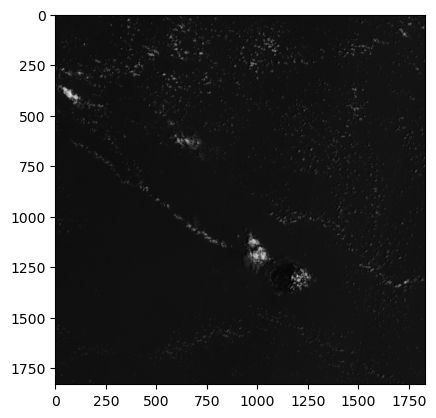

In [7]:
fig = quick_plot(f'./downloads/{optical_products[0]['Name']}.zip')

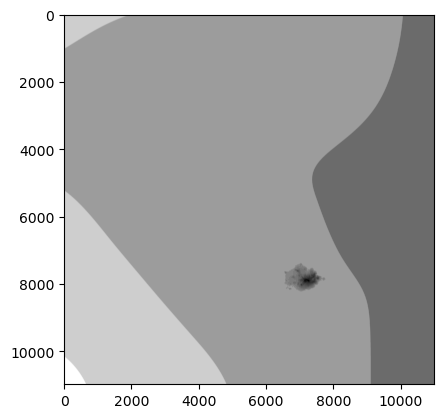

In [17]:
fig = quick_plot(f'./downloads/{optical_products[9]['Name']}.zip')

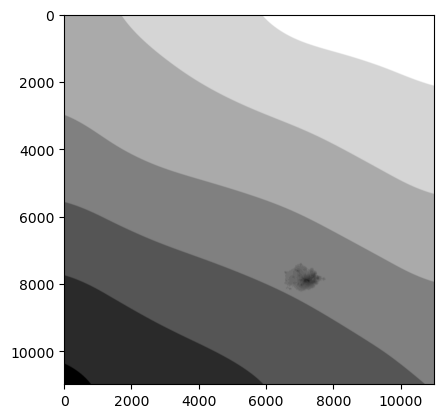

In [19]:
fig = quick_plot(f'./downloads/{optical_products[11]['Name']}.zip')

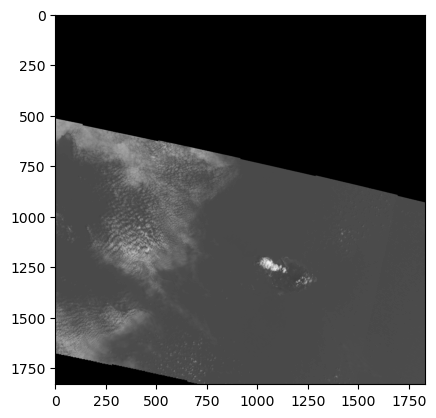

In [22]:
fig = quick_plot(f'./downloads/{optical_products[14]['Name']}.zip')

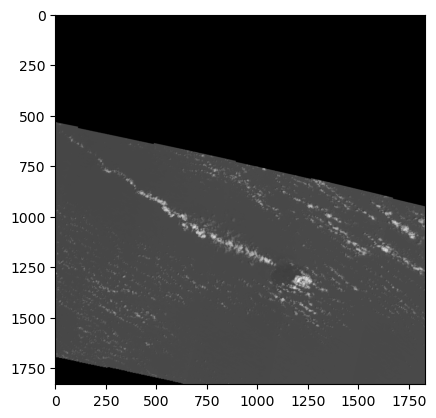

In [23]:
fig = quick_plot(f'./downloads/{optical_products[15]['Name']}.zip')